In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# from remove_correlated_descriptors import MultiCollinearityEliminator

In [51]:
df = pd.read_csv('data/data_GWP_atoms.csv')
df.isna()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,GWP
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
183,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
184,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
185,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Data Preprocessing
Reduce the numebr of desciptors by removing:
* Descriptors with zero variance
* Any one of two descriptors with a correlation coefficient > 0.95

In [52]:
def remove_collinear_features(x, threshold):

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return x

In [53]:
# def findCorrelation(corr, cutoff=0.9, exact=None):
#     """
#     This function is the Python implementation of the R function 
#     `findCorrelation()`.
    
#     Relies on numpy and pandas, so must have them pre-installed.
    
#     It searches through a correlation matrix and returns a list of column names 
#     to remove to reduce pairwise correlations.
    
#     For the documentation of the R function, see 
#     https://www.rdocumentation.org/packages/caret/topics/findCorrelation
#     and for the source code of `findCorrelation()`, see
#     https://github.com/topepo/caret/blob/master/pkg/caret/R/findCorrelation.R
    
#     -----------------------------------------------------------------------------

#     Parameters:
#     -----------
#     corr: pandas dataframe.
#         A correlation matrix as a pandas dataframe.
#     cutoff: float, default: 0.9.
#         A numeric value for the pairwise absolute correlation cutoff
#     exact: bool, default: None
#         A boolean value that determines whether the average correlations be 
#         recomputed at each step
#     -----------------------------------------------------------------------------
#     Returns:
#     --------
#     list of column names
#     -----------------------------------------------------------------------------
#     Example:
#     --------
#     R1 = pd.DataFrame({
#         'x1': [1.0, 0.86, 0.56, 0.32, 0.85],
#         'x2': [0.86, 1.0, 0.01, 0.74, 0.32],
#         'x3': [0.56, 0.01, 1.0, 0.65, 0.91],
#         'x4': [0.32, 0.74, 0.65, 1.0, 0.36],
#         'x5': [0.85, 0.32, 0.91, 0.36, 1.0]
#     }, index=['x1', 'x2', 'x3', 'x4', 'x5'])

#     findCorrelation(R1, cutoff=0.6, exact=False)  # ['x4', 'x5', 'x1', 'x3']
#     findCorrelation(R1, cutoff=0.6, exact=True)   # ['x1', 'x5', 'x4'] 
#     """
    
#     def _findCorrelation_fast(corr, avg, cutoff):

#         combsAboveCutoff = corr.where(lambda x: (np.tril(x)==0) & (x > cutoff)).stack().index

#         rowsToCheck = combsAboveCutoff.get_level_values(0)
#         colsToCheck = combsAboveCutoff.get_level_values(1)

#         msk = avg[colsToCheck] > avg[rowsToCheck].values
#         deletecol = pd.unique(np.r_[colsToCheck[msk], rowsToCheck[~msk]]).tolist()

#         return deletecol


#     def _findCorrelation_exact(corr, avg, cutoff):

#         x = corr.loc[(*[avg.sort_values(ascending=False).index]*2,)]

#         if (x.dtypes.values[:, None] == ['int64', 'int32', 'int16', 'int8']).any():
#             x = x.astype(float)

#         x.values[(*[np.arange(len(x))]*2,)] = np.nan

#         deletecol = []
#         for ix, i in enumerate(x.columns[:-1]):
#             for j in x.columns[ix+1:]:
#                 if x.loc[i, j] > cutoff:
#                     if x[i].mean() > x[j].mean():
#                         deletecol.append(i)
#                         x.loc[i] = x[i] = np.nan
#                     else:
#                         deletecol.append(j)
#                         x.loc[j] = x[j] = np.nan
#         return deletecol

    
#     if not np.allclose(corr, corr.T) or any(corr.columns!=corr.index):
#         raise ValueError("correlation matrix is not symmetric.")
        
#     acorr = corr.abs()
#     avg = acorr.mean()
        
#     if exact or exact is None and corr.shape[1]<100:
#         return _findCorrelation_exact(acorr, avg, cutoff)
#     else:
#         return _findCorrelation_fast(acorr, avg, cutoff)

In [54]:
# drop descriptors with only one value
df = df.loc[:,df.nunique()!=1]
# when two descriptors have a correlation over 0.95 remove one of them

# col_to_drop = findCorrelation(df.corr(), 0.90, 1)
# df = df.drop(col_to_drop, axis=1)

df = remove_collinear_features(df, 0.9)

In [55]:
# at this point, I think the first two steps of the paper have been recreated. However,
# the paper had 531 features left here instead of 668
df

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nHeavyAtom,nH,nB,nC,...,JGI6,JGI7,JGT,VE1_D,VE3_D,VR1_D,SRW5,WTPT-3,XLogP,GWP
0,0,-0.6854,0.469773,16.0871,11.416344,0,4,8,0,3,...,0.0,0.0,0.277778,0.000000e+00,0.000000,8.452347e+00,0.0,2.310660,0.282,4.440
1,0,0.9449,0.892836,10.8232,7.301172,0,4,4,0,2,...,0.0,0.0,0.500000,1.110000e-16,-14.694720,3.000000e+06,0.0,4.488034,1.542,6.400
2,0,-0.9734,0.947508,18.9987,14.509930,0,5,10,0,4,...,0.0,0.0,0.261574,2.220000e-16,-18.021827,2.000004e+06,0.0,2.362437,0.851,2.900
3,0,-0.6961,0.484555,20.6715,14.509930,0,5,10,0,4,...,0.0,0.0,0.486111,6.081016e-02,-1.399999,1.237595e+01,0.0,2.313053,0.742,4.290
4,0,0.1242,0.015426,21.5446,14.509930,0,5,10,0,4,...,0.0,0.0,0.486111,6.081016e-02,-1.399999,1.237595e+01,0.0,2.329115,0.579,2.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0,0.0211,0.000445,17.4128,10.884758,0,5,6,0,3,...,0.0,0.0,0.486111,6.081016e-02,-1.399999,1.237595e+01,0.0,4.899812,0.241,2.870
183,0,-1.1870,1.408969,16.2111,10.089551,0,4,7,0,2,...,0.0,0.0,0.277778,0.000000e+00,0.000000,8.452347e+00,0.0,4.621320,-1.275,9.530
184,0,-0.5281,0.278890,23.7679,14.943137,0,6,9,0,4,...,0.0,0.0,0.000000,7.220000e-16,-20.918999,2.242419e+01,0.0,5.875000,-0.576,15.500
185,0,5.1662,26.689622,49.8066,47.827032,0,13,24,0,8,...,0.0,0.0,0.995270,5.550000e-17,-48.658932,4.000027e+06,0.0,15.358678,4.392,0.828


## Normalize the Data


In [56]:
from scipy.stats import zscore

# a function to normalize all the data in a data frame execpt the target variable
def my_normalizer(df, target, noralize_target = False):
    column_names = df.columns
    normalized_data = pd.DataFrame(zscore(df), columns=column_names)
    if not noralize_target:
        normalized_data[target] = df[target]

    return normalized_data

df = my_normalizer(df, 'GWP')
df

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nHeavyAtom,nH,nB,nC,...,JGI6,JGI7,JGT,VE1_D,VE3_D,VR1_D,SRW5,WTPT-3,XLogP,GWP
0,-0.28046,-0.705055,-0.212377,-0.253202,-0.524342,-0.609286,-0.789803,0.180840,-0.103975,-0.570945,...,-0.263846,-0.143626,-0.702354,-0.625459,0.765718,-0.630200,-0.256579,-0.672318,-0.548392,4.440
1,-0.28046,0.537507,-0.143745,-0.702741,-1.037607,-0.609286,-0.789803,-0.703267,-0.103975,-0.932866,...,-0.263846,-0.143626,0.424499,-0.625459,-0.164891,1.525491,-0.256579,-0.232254,0.133326,6.400
2,-0.28046,-0.924560,-0.134876,-0.004550,-0.138494,-0.609286,-0.511661,0.622894,-0.103975,-0.209024,...,-0.263846,-0.143626,-0.784520,-0.625459,-0.375595,0.806928,-0.256579,-0.661854,-0.240537,2.900
3,-0.28046,-0.713210,-0.209979,0.138308,-0.138494,-0.609286,-0.511661,0.622894,-0.103975,-0.209024,...,-0.263846,-0.143626,0.354071,1.220320,0.677057,-0.630197,-0.256579,-0.671834,-0.299511,4.290
4,-0.28046,-0.088004,-0.286085,0.212871,-0.138494,-0.609286,-0.511661,0.622894,-0.103975,-0.209024,...,-0.263846,-0.143626,0.354071,1.220320,0.677057,-0.630197,-0.256579,-0.668588,-0.387702,2.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,-0.28046,-0.166584,-0.288515,-0.139987,-0.590644,-0.609286,-0.511661,-0.261214,-0.103975,-0.570945,...,-0.263846,-0.143626,0.354071,1.220320,0.677057,-0.630197,-0.256579,-0.149031,-0.570575,2.870
183,-0.28046,-1.087359,-0.060014,-0.242612,-0.689826,-0.609286,-0.789803,-0.040187,-0.103975,-0.932866,...,-0.263846,-0.143626,-0.702354,-0.625459,0.765718,-0.630200,-0.256579,-0.205316,-1.390802,9.530
184,-0.28046,-0.585166,-0.243344,0.402741,-0.084462,-0.609286,-0.233520,0.401867,-0.103975,-0.209024,...,-0.263846,-0.143626,-2.110920,-0.625459,-0.559072,-0.630190,-0.256579,0.048062,-1.012610,15.500
185,-0.28046,3.754845,4.041201,2.626455,4.016982,-0.609286,1.713470,3.717271,-0.103975,1.238660,...,-0.263846,-0.143626,2.935936,-0.625459,-2.315828,2.244076,-0.256579,1.964786,1.675308,0.828


In [57]:
df['ALogP'].max()

6.474031016563227

In [58]:
df.to_csv('data/preprocessed_normalized_GWP.csv', index=False)

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X = df.drop(['GWP'], axis = 1)
y = df['GWP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)


Mean Squared Error: 351.8282829499318
R^2 Value: -5.475632784649974


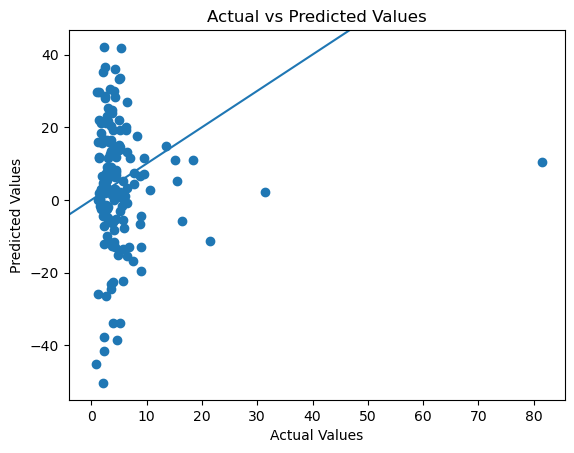

In [60]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_pred = lin_reg.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, lin_reg_pred))
print("R^2 Value:", r2_score(y_test, lin_reg_pred))

plt.scatter(y_test, lin_reg_pred)
plt.axline((0, 0), slope=1)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()